<a href="https://colab.research.google.com/github/dohyeonkim2526/AI-project/blob/main/Practice(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_apt='/content/gdrive/My Drive/인공지능융합프로젝트/기웅/아파트 일반정보 및 시세.xlsx'

In [ ]:
import pandas as pd
data_apt=pd.read_excel(data_apt)

In [ ]:
data_apt['매매지역명'].unique()

array(['강원도', '서울특별시', '대구광역시'], dtype=object)

In [ ]:
data_apt['매매지역명'].groupby(data_apt['매매지역명']).count()

매매지역명
강원도      14672
대구광역시    40362
서울특별시     1215
Name: 매매지역명, dtype: int64



*   대구광역시에 대한 데이터가 대부분이므로 대구광역시에 대해서만 예측을 진행




In [ ]:
new_apt=data_apt[data_apt['매매지역명']=='대구광역시']
new_apt=new_apt.reset_index(drop=True)

In [ ]:
new_apt=new_apt.sort_values(by=['아파트명','아파트면적값'])
new_apt[:10]

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,최근전세실거래가격,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자
1200,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,78000000,20180721,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190408
3796,201905,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,86700000,20190416,45000000,20180428,70000000,77000000,84000000,40000000,45000000,50000000,20190520
5161,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,86700000,20190416,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190422
8188,201905,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,86700000,20190416,45000000,20180428,70000000,77000000,84000000,40000000,45000000,50000000,20190513
9794,201905,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,86700000,20190416,45000000,20180428,70000000,77500000,85000000,40000000,45000000,50000000,20190527
12119,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,78000000,20180721,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190401
14464,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,78000000,20180721,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190415
16868,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,86700000,20190416,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190429
19048,201905,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,86700000,20190416,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190506
21453,202004,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,70000000,20191017,30000000,20191229,78000000,82000000,86000000,40000000,45000000,50000000,20200406


In [ ]:
new_apt.shape

(40362, 19)

In [ ]:
#new_apt=new_apt.sort_values(by=['아파트명','기준년월','시세기준일자'])
#new_apt[:10]

## 지번범위


In [ ]:
zip_data='/content/gdrive/My Drive/인공지능융합프로젝트/지번범위.txt'

In [ ]:
zip_data=pd.read_csv(zip_data, sep="|", header=0)

In [ ]:
zip_data

,우편번호,시도,시도영문,시군구,시군구영문,읍면동,읍면동영문,리명,산여부,행정동,시작주번지,시작부번지,끝주번지,끝부번지
0,25627,강원도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,모전리,0,NaN,2,3,880.0,0.0
1,25627,강원도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,모전리,1,NaN,26,3,240.0,0.0
2,25630,강원도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,산성우리,1,NaN,3,1,321.0,0.0
3,25630,강원도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,산성우리,0,NaN,24,2,390.0,1.0
4,25620,강원도,Gangwon-do,강릉시,Gangneung-si,강동면,Gangdong-myeon,상시동리,0,NaN,1,0,876.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253068,27481,충청북도,Chungcheongbuk-do,충주시,Chungju-si,호암동,Hoam-dong,NaN,0,NaN,905,0,NaN,NaN
253069,27482,충청북도,Chungcheongbuk-do,충주시,Chungju-si,호암동,Hoam-dong,NaN,0,NaN,906,0,NaN,NaN
253070,27477,충청북도,Chungcheongbuk-do,충주시,Chungju-si,호암동,Hoam-dong,NaN,0,NaN,967,0,NaN,NaN
253071,27502,충청북도,Chungcheongbuk-do,충주시,Chungju-si,호암동,Hoam-dong,NaN,0,NaN,974,0,1052.0,0.0


In [ ]:
zip_data=zip_data[zip_data['시도']=='대구광역시']
zip_data

,우편번호,시도,시도영문,시군구,시군구영문,읍면동,읍면동영문,리명,산여부,행정동,시작주번지,시작부번지,끝주번지,끝부번지
105292,42424,대구광역시,Daegu,남구,Nam-gu,대명동,Daemyeong-dong,NaN,0,NaN,2,6,2.0,32.0
105293,42426,대구광역시,Daegu,남구,Nam-gu,대명동,Daemyeong-dong,NaN,0,NaN,3,5,4.0,1.0
105294,42425,대구광역시,Daegu,남구,Nam-gu,대명동,Daemyeong-dong,NaN,0,NaN,4,4,5.0,26.0
105295,42426,대구광역시,Daegu,남구,Nam-gu,대명동,Daemyeong-dong,NaN,0,NaN,6,1,NaN,NaN
105296,42428,대구광역시,Daegu,남구,Nam-gu,대명동,Daemyeong-dong,NaN,0,NaN,7,3,9.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115022,41919,대구광역시,Daegu,중구,Jung-gu,하서동,Haseo-dong,NaN,0,NaN,29,2,31.0,2.0
115023,41934,대구광역시,Daegu,중구,Jung-gu,하서동,Haseo-dong,NaN,0,NaN,34,2,34.0,3.0
115024,41918,대구광역시,Daegu,중구,Jung-gu,향촌동,Hyangchon-dong,NaN,0,NaN,2,7,75.0,2.0
115025,41909,대구광역시,Daegu,중구,Jung-gu,화전동,Hwajeon-dong,NaN,0,NaN,2,1,45.0,1.0


In [ ]:
zip_data.duplicated(['우편번호'])

105292    False
105293    False
105294    False
105295     True
105296    False
          ...  
115022     True
115023     True
115024     True
115025     True
115026     True
Length: 9735, dtype: bool

In [ ]:
zip=zip_data[['우편번호','읍면동']]

In [ ]:
zip

,우편번호,읍면동
0,25627,강동면
1,25627,강동면
2,25630,강동면
3,25630,강동면
4,25620,강동면
...,...,...
253068,27481,호암동
253069,27482,호암동
253070,27477,호암동
253071,27502,호암동




*   그런데 같은 우편번호에 대해서 '읍면동'이 다른 경우가 존재한다.



In [ ]:
#zip.to_excel('/content/gdrive/My Drive/인공지능융합프로젝트/zip.xlsx')

In [ ]:
#zip code와 데이터 합치기
new_apt2=pd.merge(new_apt, zip, on='우편번호') #수정하고 new_apt로 합치면 된다.
#new_apt2



*   같은 우편번호에 대해서 '읍면동' 다른 경우에 대해서 해결하고 아래의 sort_apt에 (new_apt) 이름으로 데이터프레임 넣기!!



## 도로명범위

In [ ]:
#road_data='/content/gdrive/My Drive/인공지능융합프로젝트/도로명범위.txt'

In [ ]:
#road_data=pd.read_csv(road_data, sep="|", header=0)

In [ ]:
#road_data=road_data[road_data['시도']=='대구광역시']

In [ ]:
#road_data

In [ ]:
#road_data.duplicated(['우편번호'])

## **증감비율 계산**
*   (A평 거래건수 x A평 매매가 증감률 + B평 거래건수 X B평 매매가 증감률) / (A평 거래건수 + B평 거래건수)




1.   (개별 아파트 기준) 아파트 면적값당 총 거래건수 구하기 : 201904~202005
2.   (개별 아파트 기준) 아파트 면적값당 매매일반평균가격 증감비율 계산 : 201904~202005







## 1. 아파트 면적값당 총 거래건수 구하기


*   시세기준일자( 20190401,  20190408,  20190415, ...,  20200511,  20200518)

*   각 년도의 동일 아파트명, 아파트세대수를 기준으로 매매 증감률을 보기 위해 시세 기준일자의 처음과 마지막을 고려할 것
*   ex. 73신암시영 >> 49.55평 >> 20190401 & 20200518 비교하여서 증감률 파악



In [ ]:
num_apt=new_apt['시세기준일자'].groupby([new_apt['아파트명'],new_apt['아파트면적값']]).count()
num_apt=pd.DataFrame(num_apt)

In [ ]:
num_apt.index.rename(['아파트명','아파트면적값'], inplace=True)

In [ ]:
num_apt.reset_index(inplace=True)

In [ ]:
num_apt['아파트면적값']=num_apt['아파트면적값']*0.3025

In [ ]:
num_apt=num_apt.rename(columns={'시세기준일자':'거래건수'})
num_apt

,아파트명,아파트면적값,거래건수
0,73신암시영,11.440550,17
1,73신암시영,14.988875,17
2,KOASIS,39.802950,17
3,KOASIS,44.149875,17
4,KOASIS,64.919525,17
...,...,...,...
2372,희망교대성유니드,37.718725,17
2373,희망교대성유니드,42.168500,8
2374,힐스테이트황금동,18.140925,17
2375,힐스테이트황금동,25.685275,17


## 2. 아파트 면적값당 매매일반평균가격 증감비율 계산 

In [ ]:
#sort_apt=pd.concat([new_apt.drop_duplicates(['기준년월','아파트명','아파트면적값'],keep='first'), new_apt.drop_duplicates(['기준년월','아파트명','아파트면적값'],keep='last')], axis=0)
sort_apt=pd.concat([new_apt.drop_duplicates(['아파트명','아파트면적값'],keep='first'), new_apt.drop_duplicates(['아파트명','아파트면적값'],keep='last')], axis=0)
sort_apt=sort_apt.sort_values(by=['아파트명','아파트면적값'])

In [ ]:
sort_apt=sort_apt.reset_index(drop=True)
sort_apt

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,최근전세실거래가격,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자
0,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,78000000,20180721,45000000,20180428,70000000,76000000,82000000,40000000,45000000,50000000,20190408
1,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,37.82,70000000,20191017,30000000,20191229,78000000,82000000,86000000,40000000,45000000,50000000,20200518
2,201904,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,94,3,49.55,85000000,20181101,45000000,20180430,80000000,87500000,95000000,50000000,55000000,60000000,20190408
3,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,94,3,49.55,105000000,20200311,60000000,20191114,84000000,94500000,105000000,50000000,55000000,60000000,20200518
4,201904,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,131.58,520000000,20181226,340000000,20190113,420000000,470000000,520000000,280000000,310000000,340000000,20190408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,155,8,59.97,550000000,20200131,340000000,20200512,540000000,570000000,600000000,345000000,362500000,380000000,20200518
4750,201904,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,316,8,84.91,773000000,20180918,450000000,20190122,720000000,785000000,850000000,380000000,415000000,450000000,20190408
4751,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,316,8,84.91,700000000,20200221,420000000,20200513,735000000,785000000,835000000,400000000,430000000,460000000,20200518
4752,201904,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,245,8,84.93,710000000,20180820,480000000,20190309,700000000,765000000,830000000,380000000,405000000,430000000,20190408


In [ ]:
#sort_apt.to_excel('/content/gdrive/My Drive/인공지능융합프로젝트/sort.xlsx')

In [ ]:
#sort_apt['매매일반평균가격'].groupby([sort_apt['아파트명'], sort_apt['아파트면적값']]).sum()

In [ ]:
rates=[]

for i in range(0, sort_apt.shape[0], 2):
  row=sort_apt.iloc[i]
  before=row['매매일반평균가격']
  
  j=i+1
  new_row=sort_apt.iloc[j]
  after=new_row['매매일반평균가격']
  
  rate=round(after/before,2)
  rates.append(rate)
  i+=2

  if i == sort_apt.shape[0]:
    break

In [ ]:
SORT=sort_apt.drop_duplicates(['아파트명','아파트면적값'], keep='last')




*   1(m^2) = 약 0.3025평
*   (column) **아파트면적값** => 평수로 계산하기 위해서 0.3025를 곱해준다.


In [ ]:
SORT['아파트면적값']=SORT['아파트면적값']*0.3025

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#전년도대비증감비율(2019년4월~2020년5월)
SORT['증감비율']=rates

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  




*   (column) **증감비율**: 전년도대비 '매매일반평균가격'의 증감비율을 구한 것



In [ ]:
SORT

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,최근전세실거래가격,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,증감비율
1,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,11.440550,70000000,20191017,30000000,20191229,78000000,82000000,86000000,40000000,45000000,50000000,20200518,1.08
3,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,94,3,14.988875,105000000,20200311,60000000,20191114,84000000,94500000,105000000,50000000,55000000,60000000,20200518,1.08
5,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,39.802950,515000000,20191227,360000000,20190823,490000000,517500000,545000000,295000000,315000000,335000000,20200518,1.10
7,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,44.149875,385000000,20181101,360000000,20190524,550000000,580000000,610000000,345000000,370000000,395000000,20200518,1.26
9,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,21,1,64.919525,680000000,20190823,535000000,20161214,650000000,700000000,750000000,460000000,485000000,510000000,20200518,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,202005,대구광역시,42437,희망교대성유니드,대구광역시 남구 희망로5길 12,70,6,37.718725,432000000,20191012,380000000,20191216,410000000,425000000,440000000,280000000,295000000,310000000,20200518,1.05
4747,202005,대구광역시,42437,희망교대성유니드,대구광역시 남구 희망로5길 12,37,6,42.168500,525000000,20191130,385000000,20191128,470000000,495000000,520000000,320000000,340000000,360000000,20200518,1.00
4749,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,155,8,18.140925,550000000,20200131,340000000,20200512,540000000,570000000,600000000,345000000,362500000,380000000,20200518,1.14
4751,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,316,8,25.685275,700000000,20200221,420000000,20200513,735000000,785000000,835000000,400000000,430000000,460000000,20200518,1.00


In [ ]:
SORT_with_num=pd.merge(SORT, num_apt, on=['아파트명','아파트면적값'])

In [ ]:
SORT_with_num

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,최근전세실거래가격,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,증감비율,거래건수
0,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,11.440550,70000000,20191017,30000000,20191229,78000000,82000000,86000000,40000000,45000000,50000000,20200518,1.08,17
1,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,94,3,14.988875,105000000,20200311,60000000,20191114,84000000,94500000,105000000,50000000,55000000,60000000,20200518,1.08,17
2,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,39.802950,515000000,20191227,360000000,20190823,490000000,517500000,545000000,295000000,315000000,335000000,20200518,1.10,17
3,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,44.149875,385000000,20181101,360000000,20190524,550000000,580000000,610000000,345000000,370000000,395000000,20200518,1.26,17
4,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,21,1,64.919525,680000000,20190823,535000000,20161214,650000000,700000000,750000000,460000000,485000000,510000000,20200518,1.15,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,202005,대구광역시,42437,희망교대성유니드,대구광역시 남구 희망로5길 12,70,6,37.718725,432000000,20191012,380000000,20191216,410000000,425000000,440000000,280000000,295000000,310000000,20200518,1.05,17
2373,202005,대구광역시,42437,희망교대성유니드,대구광역시 남구 희망로5길 12,37,6,42.168500,525000000,20191130,385000000,20191128,470000000,495000000,520000000,320000000,340000000,360000000,20200518,1.00,8
2374,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,155,8,18.140925,550000000,20200131,340000000,20200512,540000000,570000000,600000000,345000000,362500000,380000000,20200518,1.14,17
2375,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,316,8,25.685275,700000000,20200221,420000000,20200513,735000000,785000000,835000000,400000000,430000000,460000000,20200518,1.00,17


## 대구광역시 아파트 브랜드명 (with 크롤링)


*   https://www.bdsdiet.com/servicearea/
*   사이트 설명: 전국 아파트에 대한 실거래가, 리뷰, 단지정보를 제공하는 사이트

In [ ]:
import requests
from bs4 import BeautifulSoup
 
response = requests.get('https://www.bdsdiet.com/servicearea/%EC%A4%91%EA%B5%AC/')
print(response)
print(response.text)

<Response [200]>
<!DOCTYPE html>

<html lang="ko">
    <head>
        
            <title>중구 아파트 정보 제공 - 부동산다이어트</title>
            <meta charset="utf-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <meta name="keywords" content="부동산다이어트, 송파구부동산, 아파트, 오피스텔, 매매, 전세, 월세, 부동산중개수수료, 부동산수수료, 부동산">
            <meta http-equiv="X-UA-Compatible" content="IE=edge">
            <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
            <meta content="Bdsdiet" name="creator">
            <meta content="중구 에 대한 아파트 실거래가, 리뷰, 단지정보를 확인하세요." name="description">
        


        <link rel="shortcut icon" href="/assets/images/favicon.ico"/>
        <link rel="stylesheet" href="//fonts.googleapis.com/earlyaccess/notosanskr.css">
        <link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet">
        
        <!--[if lt IE 7]>
        <script src="http://ie7-js.googlecode.com/svn/version/2.1(beta4)/

In [ ]:
import requests
import re
from bs4 import BeautifulSoup

In [ ]:
TAG=[]

def tag(response):
  html = response.text
  soup = BeautifulSoup(html, 'html.parser')
  
  for tag in soup.select('span[class=aptname]'):
    text=tag.text
    text=text.strip()
    TAG.append(text)

In [ ]:
response1 = requests.get('https://www.bdsdiet.com/servicearea/%EC%A4%91%EA%B5%AC/') #중구 아파트명
response2 = requests.get('https://www.bdsdiet.com/servicearea/%EB%8F%99%EA%B5%AC/') #동구 아파트명
response3 = requests.get('https://www.bdsdiet.com/servicearea/%EB%8B%AC%EC%84%B1%EA%B5%B0/') #달성군 아파트
response4 = requests.get('https://www.bdsdiet.com/servicearea/%EB%8B%AC%EC%84%9C%EA%B5%AC/') #달성구 아파트
response5 = requests.get('https://www.bdsdiet.com/servicearea/%EC%88%98%EC%84%B1%EA%B5%AC/') #수성구 아파트
response6 = requests.get('https://www.bdsdiet.com/servicearea/%EB%B6%81%EA%B5%AC/') #북구 아파트명
response7 = requests.get('https://www.bdsdiet.com/servicearea/%EB%82%A8%EA%B5%AC/') #남구 아파트명
response8 = requests.get('https://www.bdsdiet.com/servicearea/%EC%84%9C%EA%B5%AC/') #서구 아파트명

In [ ]:
tag(response1)
tag(response2)
tag(response3)
tag(response4)
tag(response5)
tag(response6)
tag(response7)
tag(response8)

In [ ]:
TAG

['경서',
 '남산트라팰리스',
 '남산롯데캐슬아이리스',
 '리더스뷰남산',
 '별장',
 '삼풍',
 '이지빌',
 '평화',
 '회현제2시민',
 '쌍용남산플래티넘',
 '남산퍼시픽',
 '남산센트럴자이',
 '진양상가',
 '충무로엘크루메트로시티Ⅱ(도시형)',
 '신성상가',
 '묵정',
 '충무',
 '하니맨션',
 '미주',
 '예장삼익',
 '장충라임카운티',
 '장충레지던스',
 '장충상지리츠빌카일룸',
 '장충',
 '삼성파크빌',
 '중앙',
 '이지마루오장',
 '정석그라시아',
 '코발트팰리스(도시형)',
 '대림상가',
 '청계상가',
 'J노블하우스',
 '그린빌',
 '기린',
 '남산정은스카이',
 '남산타운',
 '남산포레스트하우스',
 '남산프라임',
 '노블레스2',
 '뉴그린',
 '다다유크레스',
 '대성드림',
 '동평화',
 '란스미어',
 '래미안하이베르',
 '마이스터빌',
 '명경',
 '삼성V',
 '삼성홈타운신당',
 '성지',
 '신당삼성',
 '신당아르브(도시형)',
 '신당역솔하임5차(도시형)',
 '신당파라다이스',
 '신당푸르지오',
 '신신',
 '약수',
 '약수넥스빌',
 '약수하이츠',
 '진달래',
 '청구e편한세상',
 '청구드림',
 '청구파크뷰',
 '타워',
 '태원팰리스5차',
 '토토타워',
 '푸른마을',
 '하이(113-5)',
 '하이(113-7)',
 '한스(도시형)',
 '한진그랑빌',
 '현대',
 '동대문솔하임(도시형)',
 '동대문와이즈캐슬(도시형)',
 '리마크빌동대문(도시형)',
 '우일타운',
 '위더스하임(도시형)',
 '청계천두산위브더제니스',
 'DUO302(도시형)',
 '골드캐슬Ⅲ',
 '동광팰리스',
 '로얄',
 '롯데캐슬베네치아',
 '신당블루카운티',
 '위너빌',
 '중구리버빌',
 '창성',
 '청계리버팰리스',
 '퍼스트빌',
 '하늘드리움2차',
 '한양아이클래스(도시형)',
 '황학아크로타워',
 '황학코아루',
 '정동',
 '정동상림

In [ ]:
len(TAG)

4423

In [ ]:
#import requests
#import re
#from bs4 import BeautifulSoup

#대구광역시 중구 아파트명
#response = requests.get('https://www.bdsdiet.com/servicearea/%EC%A4%91%EA%B5%AC/')
#html = response.text
#soup = BeautifulSoup(html, 'html.parser')

#for tag in soup.select('span[class=aptname]'):
#  text=tag.text
#  text=text.strip()
#  TAG.append(text)

In [ ]:
BRAND=[]
for i in range(SORT_with_num.shape[0]):
  row=SORT_with_num.iloc[i]
  name=row['아파트명']

  if name in TAG:
    BRAND.append(1)
  elif name not in TAG:
    BRAND.append(0)

In [ ]:
SORT_with_num['브랜드']=BRAND

In [ ]:
SORT_with_num

,기준년월,매매지역명,우편번호,아파트명,아파트주소,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근매매실거래일자,최근전세실거래가격,최근전세실거래일자,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격,시세기준일자,증감비율,거래건수,브랜드
0,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,56,3,11.440550,70000000,20191017,30000000,20191229,78000000,82000000,86000000,40000000,45000000,50000000,20200518,1.08,17,0
1,202005,대구광역시,41214,73신암시영,대구광역시 동구 신암남로 10,94,3,14.988875,105000000,20200311,60000000,20191114,84000000,94500000,105000000,50000000,55000000,60000000,20200518,1.08,17,0
2,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,39.802950,515000000,20191227,360000000,20190823,490000000,517500000,545000000,295000000,315000000,335000000,20200518,1.10,17,0
3,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,42,1,44.149875,385000000,20181101,360000000,20190524,550000000,580000000,610000000,345000000,370000000,395000000,20200518,1.26,17,0
4,202005,대구광역시,42147,KOASIS,대구광역시 수성구 동대구로 149,21,1,64.919525,680000000,20190823,535000000,20161214,650000000,700000000,750000000,460000000,485000000,510000000,20200518,1.15,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,202005,대구광역시,42437,희망교대성유니드,대구광역시 남구 희망로5길 12,70,6,37.718725,432000000,20191012,380000000,20191216,410000000,425000000,440000000,280000000,295000000,310000000,20200518,1.05,17,1
2373,202005,대구광역시,42437,희망교대성유니드,대구광역시 남구 희망로5길 12,37,6,42.168500,525000000,20191130,385000000,20191128,470000000,495000000,520000000,320000000,340000000,360000000,20200518,1.00,8,1
2374,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,155,8,18.140925,550000000,20200131,340000000,20200512,540000000,570000000,600000000,345000000,362500000,380000000,20200518,1.14,17,1
2375,202005,대구광역시,42179,힐스테이트황금동,대구광역시 수성구 청수로 274,316,8,25.685275,700000000,20200221,420000000,20200513,735000000,785000000,835000000,400000000,430000000,460000000,20200518,1.00,17,1




*   [브랜드] column 설명: 브랜드 아파트이면 1, 아니면 0



## 아파트세대수, 아파트 면적값, 매매일반평균 가격의 상관관계

In [ ]:
corr3=SORT_with_num[['아파트세대수','아파트면적값','매매일반평균가격']].corr(method='pearson')

In [ ]:
corr3

,아파트세대수,아파트면적값,매매일반평균가격
아파트세대수,1.000000,-0.180667,-0.138650
아파트면적값,-0.180667,1.000000,0.667902
매매일반평균가격,-0.138650,0.667902,1.000000


## 3. 증감비율 계산
*   (A평 거래건수 x A평 매매가 증감률 + B평 거래건수 X B평 매매가 증감률) / (A평 거래건수 + B평 거래건수)

In [ ]:
from tqdm import tqdm #for문 진행 상태 확인
APART=[]
TOTAL=[]

for i in tqdm(range(SORT_with_num.shape[0])):
  RATES=[]
  COUNTS=[]
  CAL=[]
  row=SORT_with_num.iloc[i]
  name=row['아파트명']
  rate=row['증감비율']
  count=row['거래건수']
  
  if name not in APART:

    APART.append(name)
    RATES.append(rate)
    COUNTS.append(count)
    
    for j in range(1,SORT_with_num.shape[0]):
      
      row2=SORT_with_num.iloc[j]
      name2=row2['아파트명']
      
      if name2 in APART:
        rate2=row2['증감비율']
        count2=row2['거래건수']
        RATES.append(rate2)
        COUNTS.append(count2)
        
      if name2 not in APART:
        break

    for c in range(len(COUNTS)):
      cal=COUNTS[c]*RATES[c]
      CAL.append(cal)
    
    total=sum(CAL)/sum(COUNTS)
    TOTAL.append(total)

  else:
    continue


100%|██████████| 2377/2377 [03:22<00:00, 11.74it/s]


In [ ]:
TOTAL

[1.08,
 1.1380000000000001,
 1.057,
 1.0399999999999998,
 1.0553846153846151,
 1.0533333333333332,
 1.0671385542168674,
 1.061432664756447,
 1.04935,
 1.0450921658986174,
 1.0396494845360824,
 1.0376294820717131,
 1.032543859649123,
 1.0483169934640524,
 1.0387155963302752,
 1.044384303112314,
 1.0387484510532836,
 1.0438525564803802,
 1.039276457883369,
 1.0366468842729968,
 1.0368923933209648,
 1.0366904549509366,
 1.0361458333333333,
 1.033784461152882,
 1.0371714743589742,
 1.0433913043478258,
 1.0433025404157041,
 1.0418389057750757,
 1.045318518518518,
 1.040387870239774,
 1.0370524899057871,
 1.0377894736842104,
 1.0449104859335037,
 1.0394520547945203,
 1.0669102063580593,
 1.0699190064794817,
 1.076828125,
 1.0786233367451383,
 1.0767082294264338,
 1.0753400868306802,
 1.0738512241054614,
 1.0848247978436658,
 1.091539445628998,
 1.0949419568822556,
 1.0920932134096486,
 1.090350806451613,
 1.0884526650755768,
 1.0878585539312524,
 1.0864050235478806,
 1.0838490566037735,
 1.0

In [ ]:
NUM_SORT=SORT_with_num.groupby(['아파트명'])['아파트면적값'].mean()
NUM_SORT=pd.DataFrame(NUM_SORT)
NUM_SORT

,아파트면적값
아파트명,
73신암시영,13.214712
KOASIS,49.624117
SD아이프라임강북,32.890825
e편한세상범어,21.896462
가든하이츠1,32.385650
...,...
효성타운1차,37.125825
효성타운2차,32.614542
효신,17.050413


In [ ]:
NUM_SORT['증감비율']=TOTAL

In [ ]:
NUM_SORT=NUM_SORT.reset_index(drop=False)

In [ ]:
BRAND=[]
for i in range(NUM_SORT.shape[0]):
  row=NUM_SORT.iloc[i]
  name=row['아파트명']

  if name in TAG:
    BRAND.append(1)
  elif name not in TAG:
    BRAND.append(0)

In [ ]:
NUM_SORT['브랜드']=BRAND

In [ ]:
NUM_SORT

,아파트명,아파트면적값,증감비율,브랜드
0,73신암시영,13.214712,1.080000,0
1,KOASIS,49.624117,1.138000,0
2,SD아이프라임강북,32.890825,1.057000,1
3,e편한세상범어,21.896462,1.040000,1
4,가든하이츠1,32.385650,1.055385,0
...,...,...,...,...
823,효성타운1차,37.125825,1.035903,0
824,효성타운2차,32.614542,1.035908,0
825,효신,17.050413,1.036423,1
826,희망교대성유니드,30.835035,1.036232,1




*   **아파트면적값**: 해당 아파트 면적의 평균값
*   **증감비율**: 아파트 면적과 거래 건수를 이용하여 계산한 매매일반평균가격 증감비율
*   **브랜드**: 브랜드 아파트이면 1, 아니면 0


In [ ]:
NUM_SORT['평수기준']=pd.cut(NUM_SORT['아파트면적값'], bins=list(range(0,55,5)), labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50'])

In [ ]:
NUM_SORT

,아파트명,아파트면적값,증감비율,브랜드,평수기준
0,73신암시영,13.214712,1.080000,0,10-15
1,KOASIS,49.624117,1.138000,0,45-50
2,SD아이프라임강북,32.890825,1.057000,1,30-35
3,e편한세상범어,21.896462,1.040000,1,20-25
4,가든하이츠1,32.385650,1.055385,0,30-35
...,...,...,...,...,...
823,효성타운1차,37.125825,1.035903,0,35-40
824,효성타운2차,32.614542,1.035908,0,30-35
825,효신,17.050413,1.036423,1,15-20
826,희망교대성유니드,30.835035,1.036232,1,30-35


In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=20)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

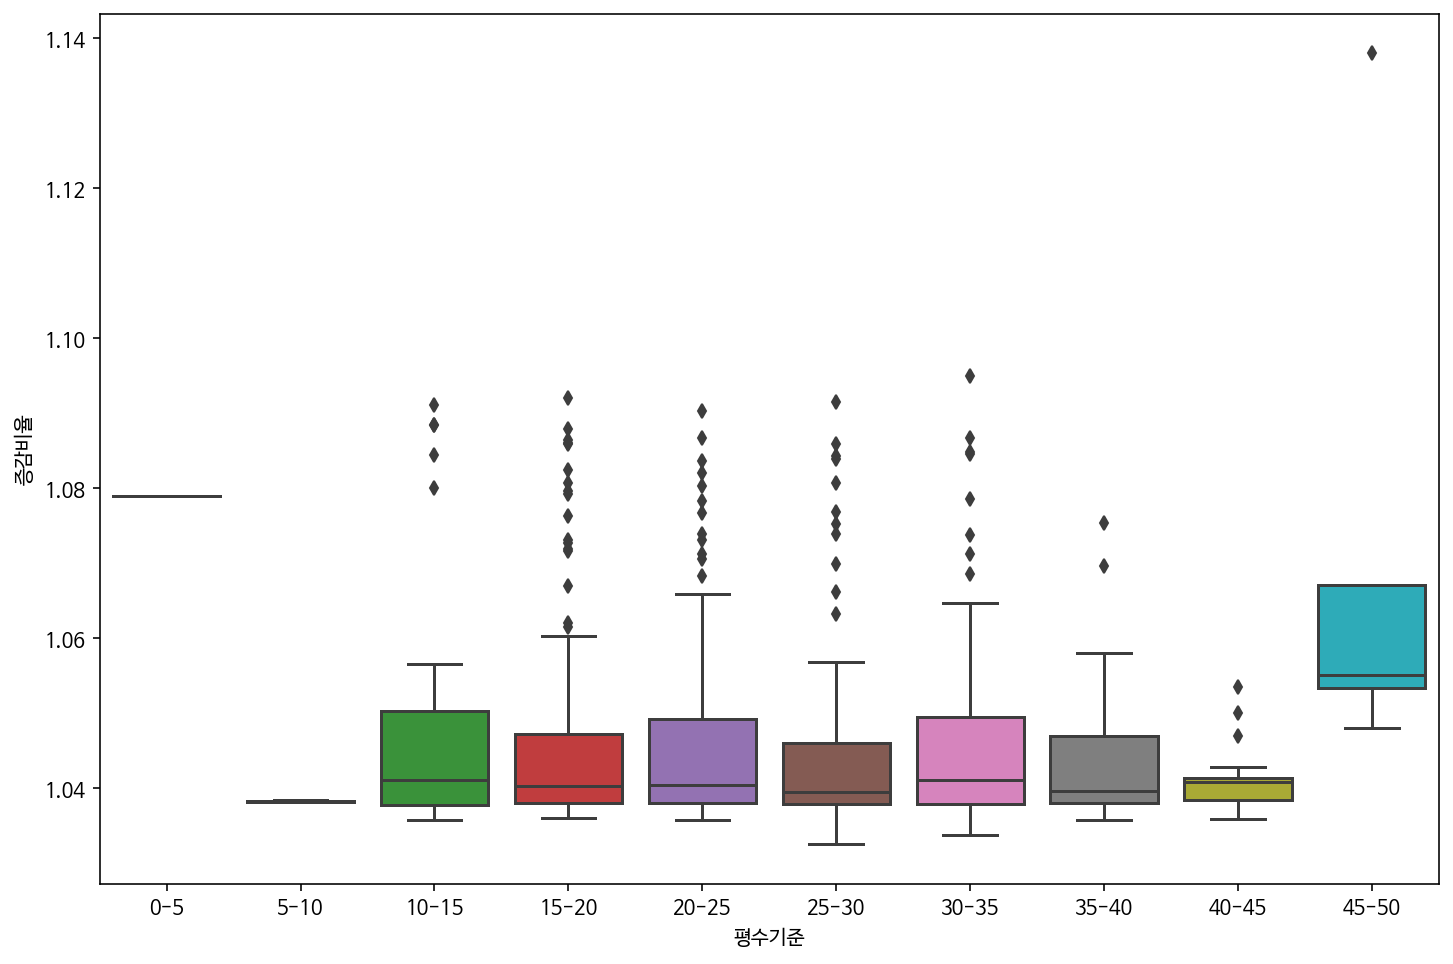

In [ ]:
#평수에 따른 매매일반평균가격 증감비율비교
import seaborn as sns

fig,ax=plt.subplots()
#plt.rc('font', family=font_name) 
fig.set_size_inches(12,8)
sns.boxplot(data=NUM_SORT, x='평수기준',y='증감비율')

## 아파트 면적과 매매일반평균가격 증감비율의 상관관계

In [ ]:
corr2=NUM_SORT[['아파트면적값','증감비율','브랜드']].corr(method='pearson')
corr2

,아파트면적값,증감비율,브랜드
아파트면적값,1.000000,-0.034245,0.063205
증감비율,-0.034245,1.000000,0.024511
브랜드,0.063205,0.024511,1.000000




*   아파트 평수별 가중치 평균을 통해서 매매일반 평균을 구해본 결과 => 결과 발표하고, 증감률의 차이가 큰 것인지 물어보기!!



## (종속변수 상관관계)

In [ ]:
corr_SORT=SORT[['아파트세대수','아파트동수','아파트면적값','최근매매실거래가격','최근전세실거래가격','매매하위평균가격','매매일반평균가격','매매상위평균가격','전세하위평균가격','전세일반평균가격','전세상위평균가격']]
corr_SORT=corr_SORT.reset_index(drop=True)

In [ ]:
corr=corr_SORT.corr(method='pearson')
corr

,아파트세대수,아파트동수,아파트면적값,최근매매실거래가격,최근전세실거래가격,매매하위평균가격,매매일반평균가격,매매상위평균가격,전세하위평균가격,전세일반평균가격,전세상위평균가격
아파트세대수,1.000000,0.334862,-0.180667,-0.139632,-0.103196,-0.142525,-0.138650,-0.135107,-0.101041,-0.097549,-0.094317
아파트동수,0.334862,1.000000,0.079820,0.085673,0.102415,0.077931,0.081574,0.084764,0.108078,0.111807,0.115075
아파트면적값,-0.180667,0.079820,1.000000,0.665911,0.705861,0.666607,0.667902,0.668612,0.721789,0.719173,0.716202
최근매매실거래가격,-0.139632,0.085673,0.665911,1.000000,0.899914,0.989827,0.990557,0.990551,0.936281,0.939237,0.941104
최근전세실거래가격,-0.103196,0.102415,0.705861,0.899914,1.000000,0.904730,0.906316,0.907127,0.959195,0.959792,0.959514
매매하위평균가격,-0.142525,0.077931,0.666607,0.989827,0.904730,1.000000,0.999606,0.998592,0.943076,0.945486,0.946855
매매일반평균가격,-0.138650,0.081574,0.667902,0.990557,0.906316,0.999606,1.000000,0.999688,0.944762,0.947382,0.948938
매매상위평균가격,-0.135107,0.084764,0.668612,0.990551,0.907127,0.998592,0.999688,1.000000,0.945637,0.948441,0.950164
전세하위평균가격,-0.101041,0.108078,0.721789,0.936281,0.959195,0.943076,0.944762,0.945637,1.000000,0.999504,0.998207
전세일반평균가격,-0.097549,0.111807,0.719173,0.939237,0.959792,0.945486,0.947382,0.948441,0.999504,1.000000,0.999597




*   상관 분석: 두 변수간에 어떤 선형적 관계를 갖고 있는지 분석하는 방법
*   상관 관계: 두 변수간의 관계의 정도를 나타내는 것
*   한 변수의 변화에 따른 변수의 변화 정도와 방향을 통해 연관된 정보를 나타낼 뿐, 인과관계를 의미하진 않는다.



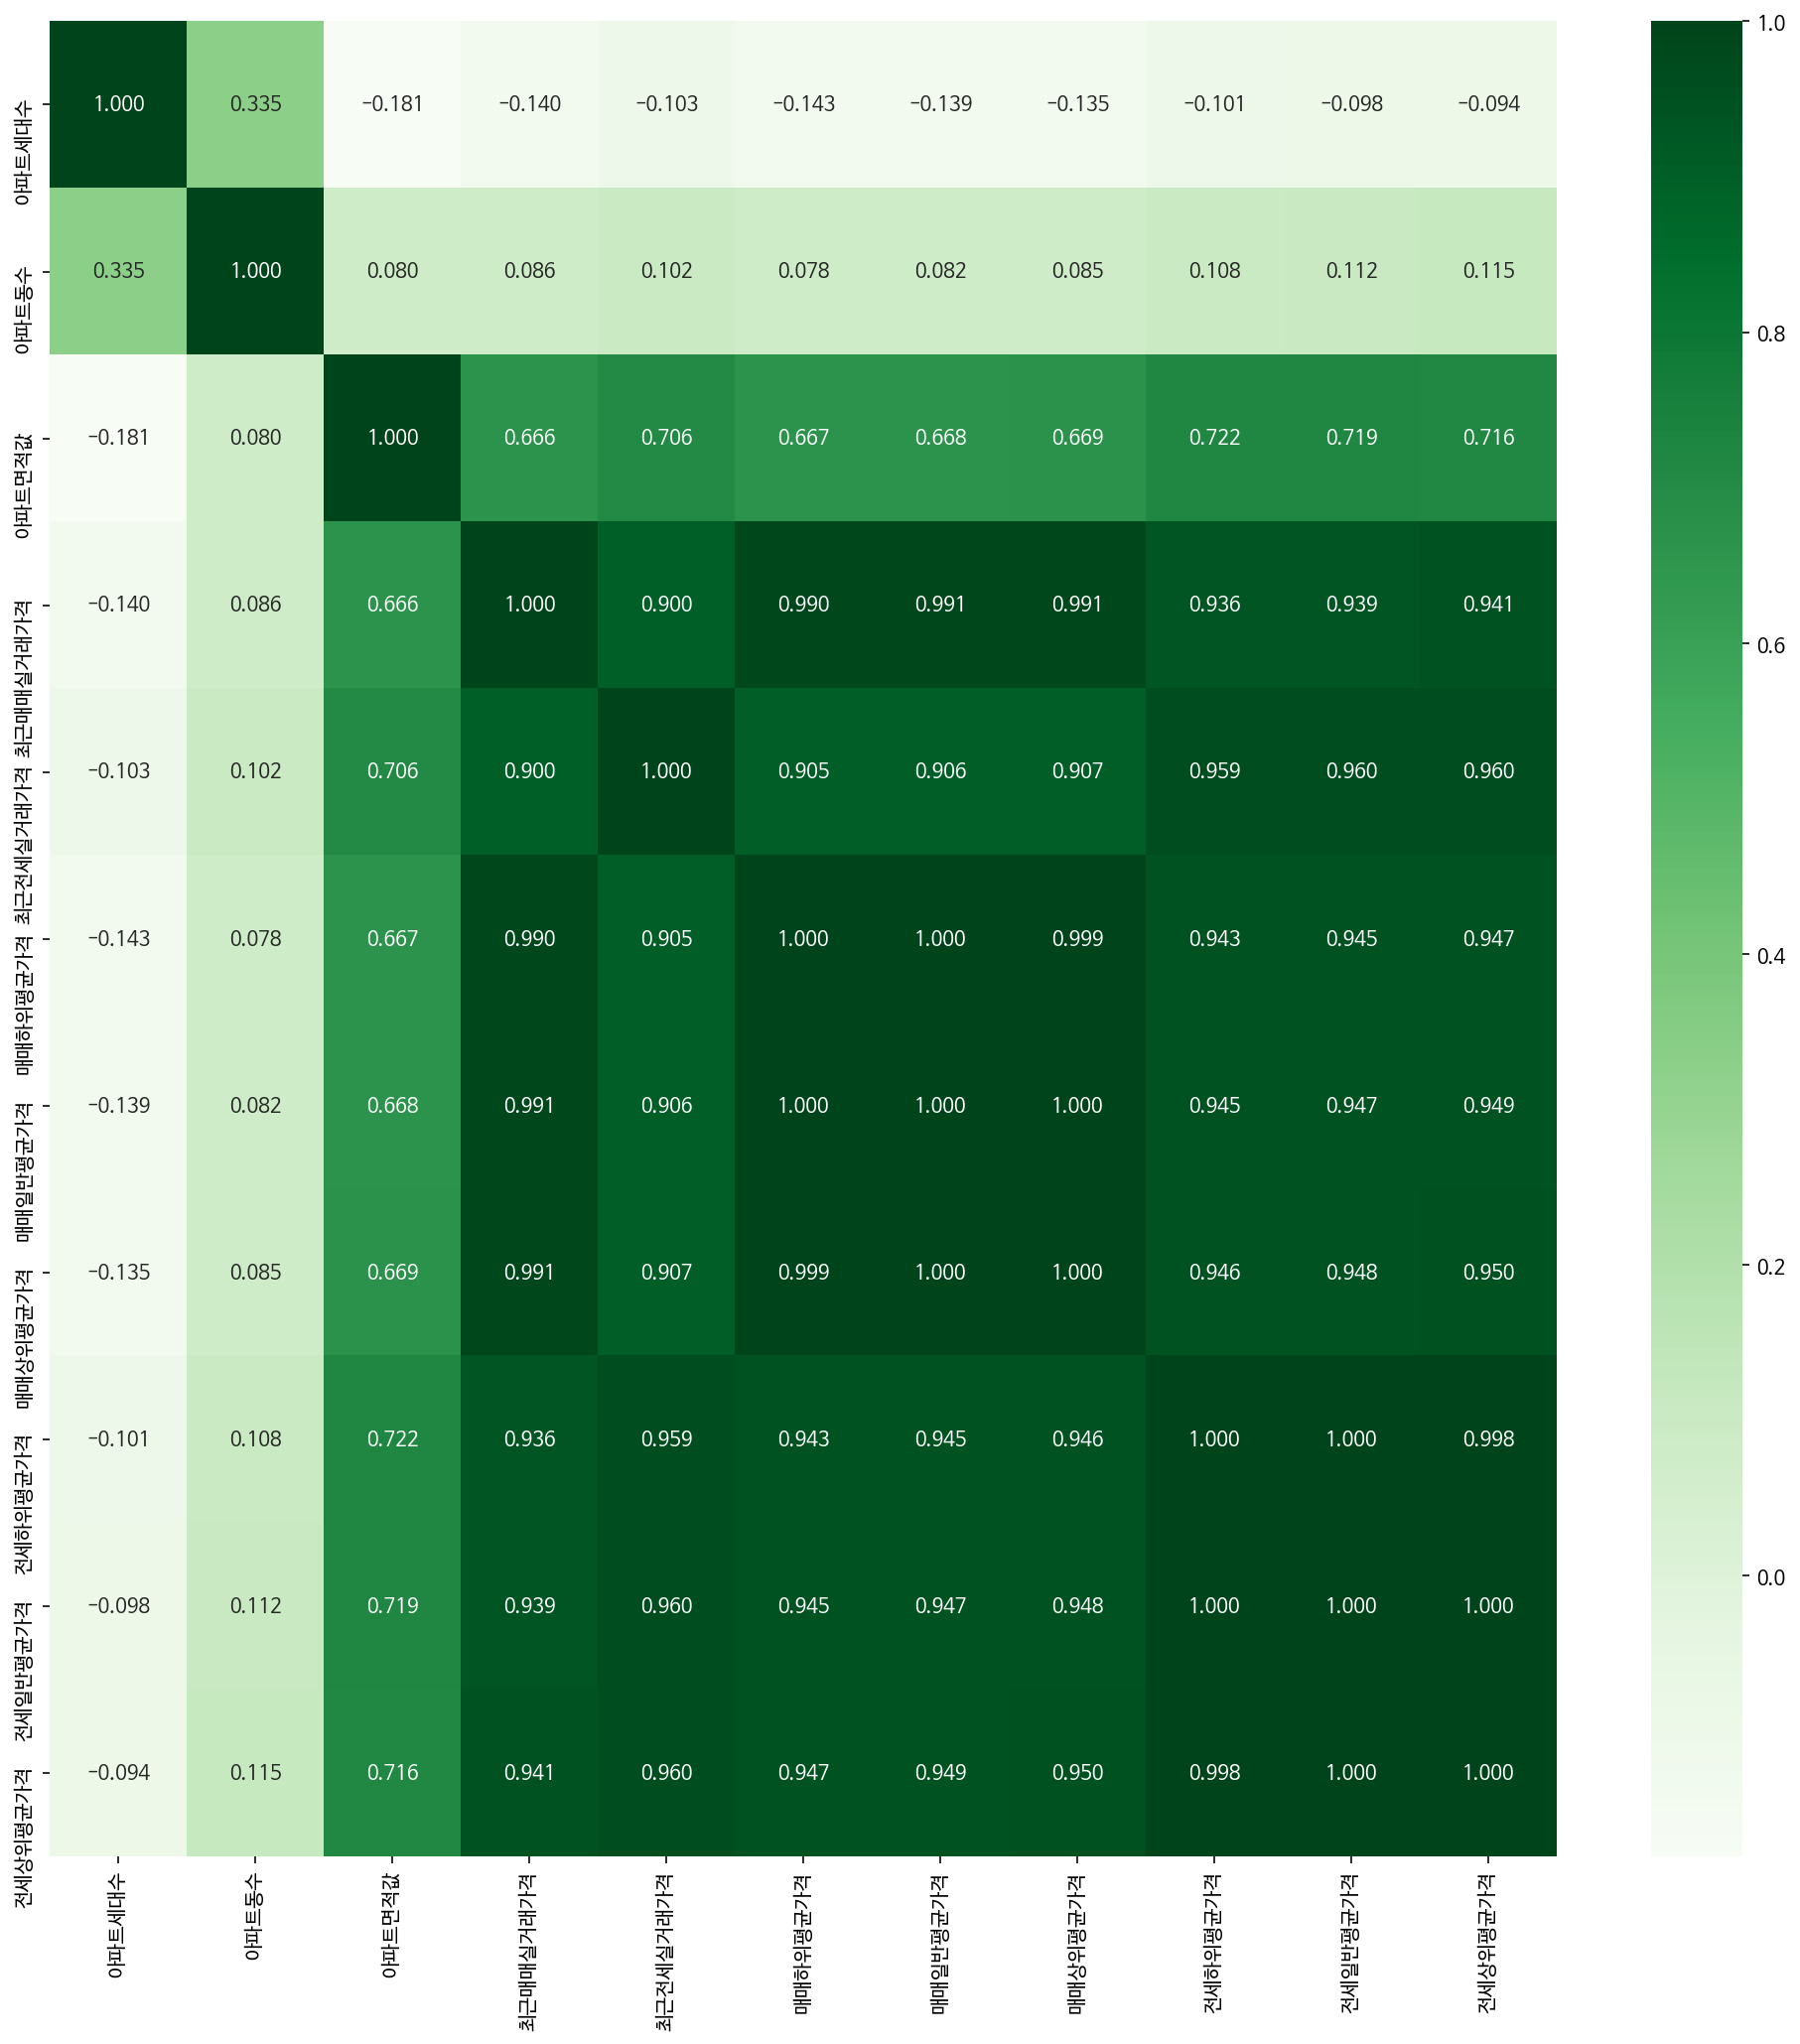

In [ ]:
plt.rcParams['figure.figsize']=(17,17)
sns.heatmap(corr, annot=True, fmt='.3f', cmap='Greens')



*   아파트 세대수



### 매매일반 평균
1. 아파트 평수 기준으로 평수 별 가중치 평균 부여
2. 브랜드와 비브랜드의 구분
3. 아파트의 세대수의 'histogram' 분포를 통해서 세대수 파악
4. 교통, 해당 지역의 학군

In [ ]:
#data_num='/content/gdrive/My Drive/인공지능융합프로젝트/기웅/세대수.xlsx'
#data_num=pd.read_excel(data_num)

In [ ]:
#data_num[:2]

In [ ]:
#new_num=data_num[(data_num['매매지역명']=='대구광역시')]
#new_num=new_num.drop(['1년미만거주기간세대수','1년거주기간세대수','2년거주기간세대수','3년거주기간세대수','4년거주기간세대수','5년이상거주기간세대수'],axis=1)

In [ ]:
#new_num=new_num.reset_index(drop=True)

In [ ]:
#new_num[:5]